In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data[(data["age"]==19)&(data["charges"]==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
col_num = [col for col in data.columns if data[col].dtypes not in ["object"]]
col_cat = [col for col in data.columns if data[col].dtypes in ["object"]]

In [11]:
len(col_num), len(col_cat)

(4, 3)

## Descripción del dataset.
* #### El dataset contiene 1338 filas y 7 columnas.
* #### 7 de esas columnas 6 son variables independientes y 1 es dependiente (charges).
* #### Contiene 4 columnas numéricas siendo la variable dependiente una de ellas y 3 columnas categóricas.
* #### No tiene valores nulos.
* #### Tiene una fila duplicada pero por razones de que pueden haber dos personas con la misma edad, mismo indice de masa corporal, mismo sexo, que no fumen, sin hijos y de la misma región es que decido no eliminar una de ellas del dataset. Si hubiera más información, por ejemplo, que si tuvieran el mismo nombre y/o mismo DNI, ya habría tenido razones para aceptar que cargaron a la misma persona 2 veces.

## Análisis de variables numéricas
### Variable dependiente ("charges")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

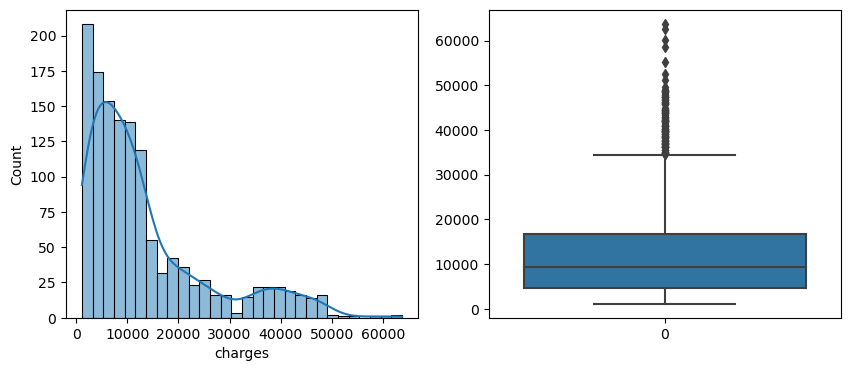

In [13]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(data["charges"], kde=True)

plt.subplot(1,2,2)
sns.boxplot(data["charges"])

plt.show()

In [14]:
data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

> #### Descripción variable dependiente
* #### El histograma presenta una asimetría positiva.
* #### Los costos tienen una media de 13.270 con una desviación estándar de 12.110
* #### El 75% de los costos están por debajo de 16.639 mientras que el 15% restante está entre 16.640 y 63.770

### Variables independientes

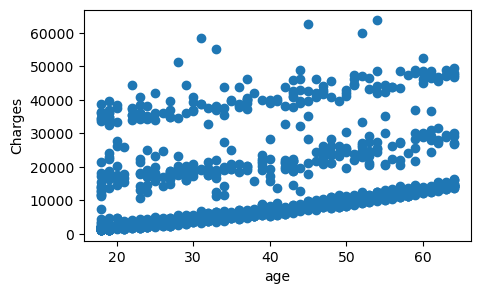

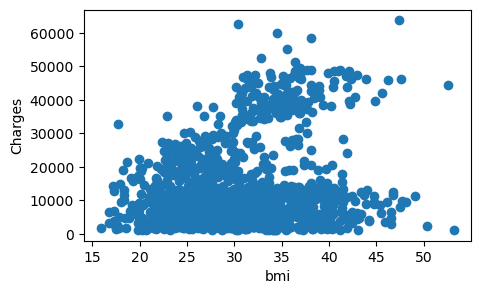

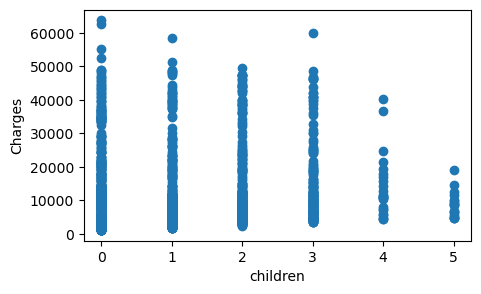

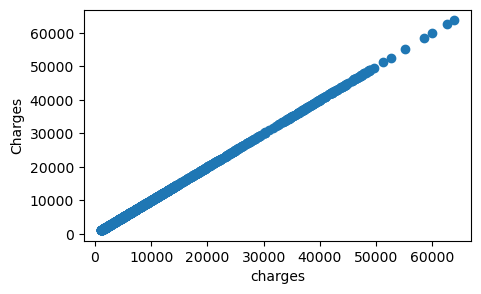

In [15]:
for col in col_num:
    plt.figure(figsize=(5,3))
    plt.scatter(x=data[col],y=data["charges"])
    plt.ylabel("Charges")
    plt.xlabel(col)
    plt.show()

In [16]:
data[col_num].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Descripción de correlación de las variables numéricas contra la variable dependiente.
* #### No hay una correlación fuerte en alguna de las variables númericas con la variable dependiente, ninguna supera el 30%.

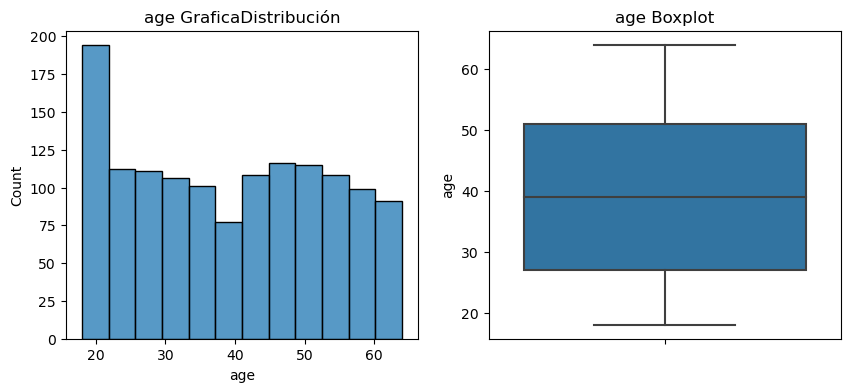

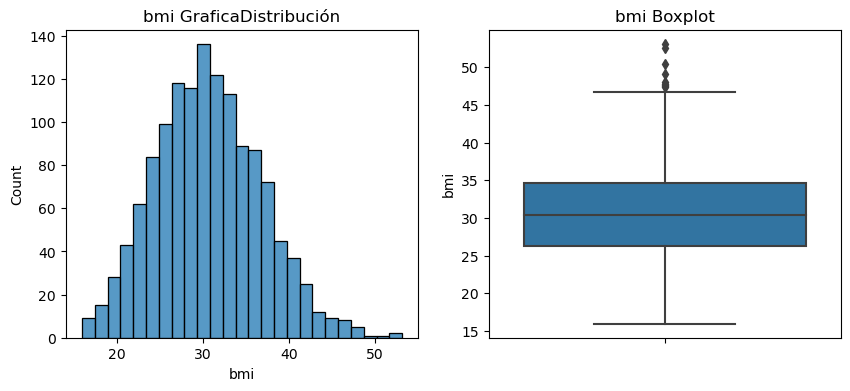

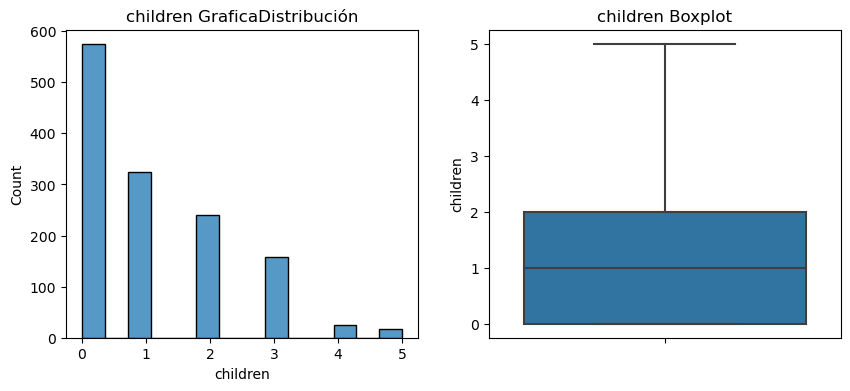

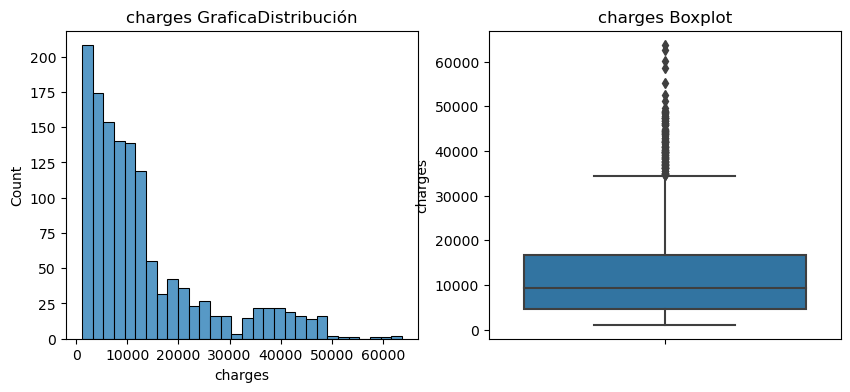

In [17]:
for col in col_num:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title(col+" GraficaDistribución")
    sns.histplot(data[col])
    
    plt.subplot(1,2,2)
    plt.title(col+" Boxplot")
    sns.boxplot(y=data[col])
    
    plt.show()

In [18]:
data[col_num].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Descripción variables numéricas.
* #### La mayor cantidad de personas son las que tienen 20 años, sin embargo por la cantidad de datos el promedio de edad es de 39 años.
* #### El promedio de indice de masa corporal es 30.
* #### Hay más personas sin hijos afiliados al seguro, sin embargo el promedio de hijos por personas es 1.

## Análisis de variables categóricas.

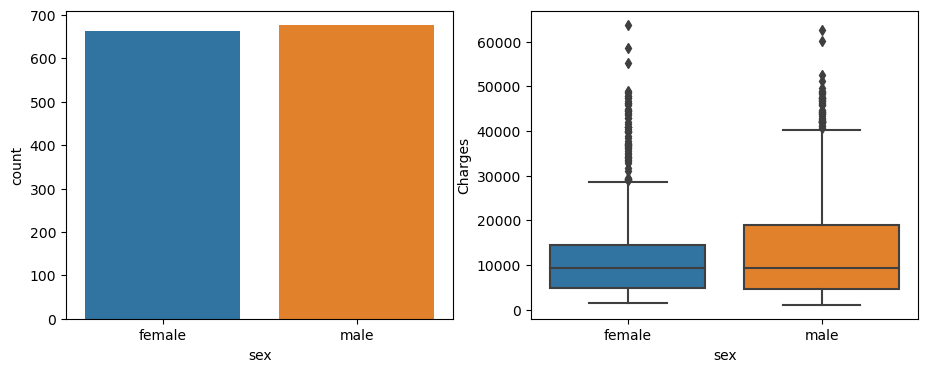

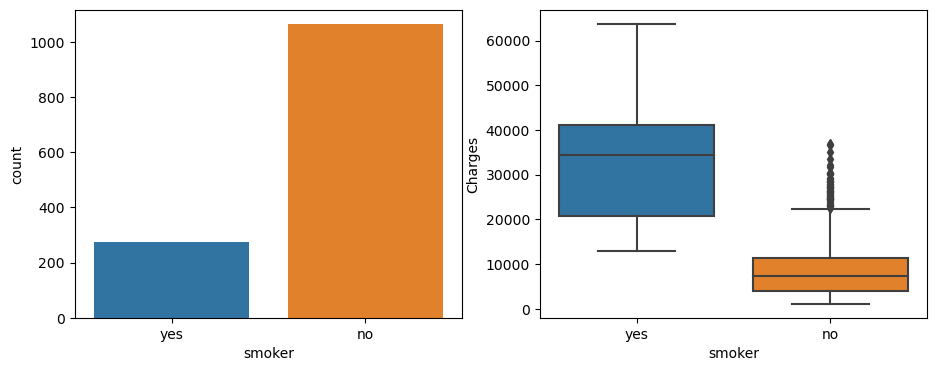

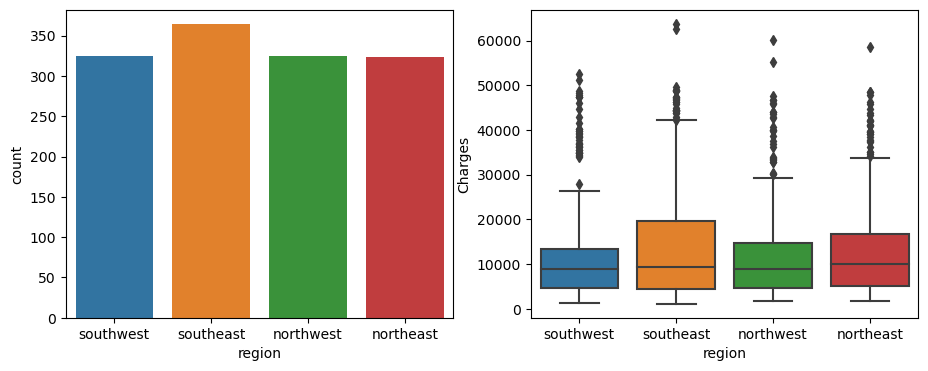

In [19]:
for col in col_cat:
    plt.figure(figsize=(11,4))
    
    plt.subplot(1,2,1)
    sns.countplot(x=data[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col],y=data["charges"])
    plt.xlabel(col)
    plt.ylabel("Charges")
    
    plt.show()

In [20]:
group_gender = data.groupby("sex")
group_gender.mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [21]:
group_smoker = data.groupby("smoker")
group_smoker.mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [22]:
group_region = data.groupby("region")
group_region.mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


### Descripción variables categóricas.
* #### La cantidad de personas masculinas y femeninas es casi la misma.
* #### Hay casi 4 veces más personas fumadoras que las que no fuman.
* #### Las personas que fuman tienen que pagar casi 4 veces más que las que no fuman.
* #### Las personas que residen en el sureste tienen un poco más de indice de masa corporal que el resto. 

## Preprocesado de datos.

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Transformar variables categoricas en variables dummies para la construcción del modelo de regresión lineal

In [24]:
sex_dummy = pd.get_dummies(data["sex"],prefix="sex",drop_first=True)
smoker_dummy = pd.get_dummies(data["smoker"],prefix="smoker",drop_first=True)
region_dummy = pd.get_dummies(data["region"],prefix="region",drop_first=True)

In [25]:
data_new = data.drop(["sex","smoker","region"],axis=1)
data_new = pd.concat([data_new,sex_dummy,smoker_dummy,
                     region_dummy],axis=1)
data_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Chequear las correlaciones nuevamente con todas las variables.

In [26]:
data_new.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


* #### smoker_yes, es decir las personas que fuman, es la única variable que tiene correlación con la variable dependiente

### Chequeo de multicolinealidades con VIF (variance inflation factor)

In [27]:
X = data_new.drop(["charges"],axis=1)
Y = data_new["charges"]

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["column"] = X.columns

vif

,VIF,column
0,7.686965,age
1,11.358443,bmi
2,1.809930,children
3,2.003185,sex_male
4,1.261233,smoker_yes
5,1.890281,region_northwest
6,2.265564,region_southeast
7,1.960745,region_southwest


* #### Observamos que la columna bmi (indice de masa corporal) tiene un alto grado de multicolinealidad, por lo que la quitamos de nuestro modelo.

In [29]:
X.drop(["bmi"],axis=1,inplace=True)
X.head()

,age,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,0,1,0,0,1
1,18,1,1,0,0,1,0
2,28,3,1,0,0,1,0
3,33,0,1,0,1,0,0
4,32,0,1,0,1,0,0


### Separamos los datos en datos de entrenamiento y datos de pruebas para la construccion y evaluación del modelo.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1070, 7) (1070,)
(268, 7) (268,)


## Construcción del modelo

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## Evaluación del modelo

In [33]:
charges_predict = lm.predict(x_test)

### Calculamos el R2 (R cuadrado) que nos indica que tan bien se ajusta la prediccion con nuestros valores actuales

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,charges_predict)

0.7755346258651233

In [35]:
lm.score(x_test,y_test)

0.7755346258651233

* #### El modelo se ajusta un 77% a los valores verdaderos del dateset

### Calculamos el error cuadrado de los residuos, es decir, la desviación estandar residual.

In [36]:
SSD = sum((y_test-charges_predict)**2)
SSD

9572736629.692877

In [37]:
RSE = np.sqrt(SSD/(len(x_test)-len(x_test.columns.values)-1))
RSE

6067.801727686153

* #### El error estandar residual es de 6067.

In [38]:
charges_mean = np.mean(charges_predict)
charges_mean

13417.97983076891

In [39]:
error = RSE/charges_mean
error

0.4522142531301182

* #### Hay un 45% de error que el modelo no puede explicar

### Realizaré un modelo mas exhaustivo para ver si podemos incrementar el nivel de ajuste de la predicción y disminuir el error.
* #### Voy a utilizar el metodo RFE (Eliminación recursiva de atributos) incorporando nuevamente la columna bmi para corroborar si efectivamente hay que eliminarla o no.

In [40]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [41]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select = (len(x_train.columns.values)-3),step=1)
selector = selector.fit(x_train,y_train)

In [42]:
print(selector.support_)
print(x_train.columns.values)

[ True  True  True  True False False False]
['age' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


#### El modelo de selección de variables nos indica que la columna bmi y la columna region_northwest no deben incluirse en el modelo de predicción.

### Utilizaré otro metodo para realizar la predicción utilizando la libreria statsmodels para hacer un chequeo más exhaustivo de las variables, observar su p valor individualmente y observar el p valor del estadístico f.

In [43]:
import statsmodels.formula.api as smf

In [44]:
#("+").join(x_train.columns.values)
train,test = train_test_split(data_new,test_size=0.2,random_state=0)

In [45]:
lm2 = smf.ols(formula="charges~"+("+").join(x_train.columns.values),data=train).fit()

In [46]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     371.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.42e-280
Time:                        22:56:56   Log-Likelihood:                -10904.
No. Observations:                1070   AIC:                         2.182e+04
Df Residuals:                    1062   BIC:                         2.186e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2696.2870    745.394     -3.617      0.000   -4158.899   -1233.675
age                270.2830     14.101     19.168      0.000     242.614     297.952
children           466.2764    164.303      2.838      0.005     143.881     788.672
sex_male           102.6243    396.723      0.259      0.796    -675.826     881.075
smoker_yes        2.343e+04    493.580     47.474      0.000    2.25e+04    2.44e+04
region_northwest  -327.8673    577.488     -0.568      0.570   -1461.013     805.279
region_southeast   553.1110    557.907      0.991      0.322    -541.614    1647.836
region_southwest  -361.8117    568.761     -0.636      0.525   -1477.834     754.211
==============================================================================
Omnibus:                      234.326   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.392
Skew:                           1.160   Prob(JB):                    6.89e-126
Kurtosis:                       5.746   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
lm2.pvalues

Intercept            3.117351e-04
age                  1.470529e-70
children             4.627563e-03
sex_male             7.959326e-01
smoker_yes          8.139136e-265
region_northwest     5.703262e-01
region_southeast     3.217141e-01
region_southwest     5.248220e-01
dtype: float64

### Conclusiones del modelo de predicción lineal con la librería statsmodels.
* #### Observamos un p valor del estadístico f por lo que no habría de preocuparnos de que todos los coeficientes que acompañan a las variables sean 0.
* #### Pero si observamos, que las variables sex_male, region_northwest, region_southeast, region_southwest tienen un p valor alto, por lo que podríamos eliminarlas del modelo. De esta manera conlcuyo que el sexo y la región de la persona no influye en el costo final del seguro medico, pero los que si influyen son la edad, el indice de masa corporal, si tiene hijos y si es o no fumador.

In [48]:
X = data_new.drop(["charges"],axis=1)
Y = data_new["charges"]

In [49]:
X.drop(["sex_male","region_northwest",
       "region_southeast","region_southwest"],
       axis=1,inplace=True)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1070, 4) (1070,)
(268, 4) (268,)


In [51]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [52]:
charges_predict = lm.predict(x_test)

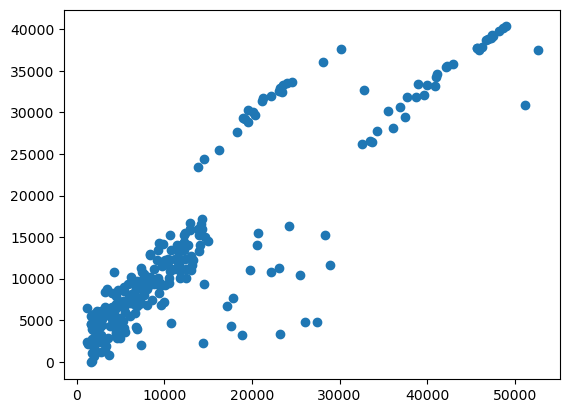

In [53]:
plt.scatter(y_test,charges_predict)

(array([ 20.,  12., 105.,  73.,  11.,  32.,   5.,   5.,   1.,   4.]),
 array([-10770.3312807 ,  -7436.49379967,  -4102.65631864,   -768.81883762,
          2565.01864341,   5898.85612444,   9232.69360546,  12566.53108649,
         15900.36856752,  19234.20604854,  22568.04352957]),
 <BarContainer object of 10 artists>)

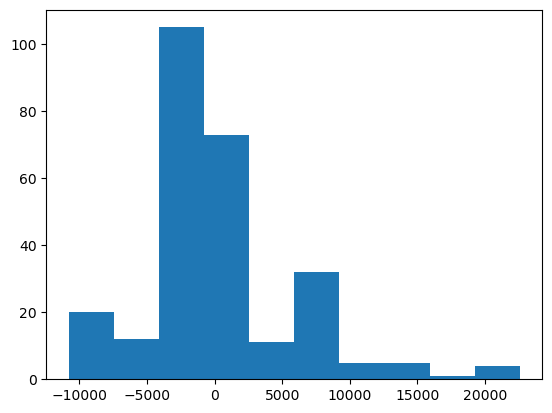

In [54]:
plt.hist(y_test-charges_predict)

In [55]:
lm.score(x_test,y_test)

0.7978274606303823

In [56]:
x_test.head()

,age,bmi,children,smoker_yes
578,52,30.200,1,0
610,47,29.370,1,0
569,48,40.565,2,1
1034,61,38.380,0,0
198,51,18.050,0,0
